<a href="https://colab.research.google.com/github/MohameddAkmall/Codveda-Iris-Dataset/blob/main/Codveda_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Data handling
import pandas as pd

# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Normalization / Standardization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Train-test split
from sklearn.model_selection import train_test_split

# Model
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree



# Metrics
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


Cell 2 – Load & Inspect Data

In [2]:
# Load the dataset
df = pd.read_csv("/content/1) iris.csv")

# Quick look at the dataset
print(df.head())
print(df.info())
print(df.isnull().sum())  # check missing values


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


Cell 3 – Handle Missing Data


In [3]:
# In Iris, usually no missing values, but here's how you’d handle them:
# Fill numeric columns with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill categorical columns with mode
for col in df.select_dtypes(include=["object"]).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values after handling:\n", df.isnull().sum())


Missing values after handling:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


/tmp/ipython-input-3877075602.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Cell 4 – Encode Categorical Variables

In [4]:
# Encode the 'species' column (categorical → numeric)
le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])

print("Encoded target values:", df["species"].unique())
print("Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Encoded target values: [0 1 2]
Mapping: {'setosa': np.int64(0), 'versicolor': np.int64(1), 'virginica': np.int64(2)}


Cell 5 – Normalize / Standardize Numerical Features

In [9]:
# Standardize numeric features
scaler = MinMaxScaler()
df[["sepal_length", "sepal_width", "petal_length", "petal_width"]] = scaler.fit_transform(
    df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
)

print(df.head())


   sepal_length  sepal_width  petal_length  petal_width  species
0      0.222222     0.625000      0.067797     0.041667        0
1      0.166667     0.416667      0.067797     0.041667        0
2      0.111111     0.500000      0.050847     0.041667        0
3      0.083333     0.458333      0.084746     0.041667        0
4      0.194444     0.666667      0.067797     0.041667        0


Cell 6 – Split into Training and Validation Sets

In [10]:
# Define features and target
X = df.drop("species", axis=1)
y = df["species"]

# Split into training (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)


Training set shape: (120, 4)
Validation set shape: (30, 4)


Cell 7 – Train KNN Model

In [22]:
# Initialize KNN with K=3 (default start)
knn = KNeighborsClassifier(n_neighbors=3)

# Train on training data
knn.fit(X_train, y_train)

# Predict on validation data
y_pred = knn.predict(X_val)


Cell 8 – Evaluate Performance

Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



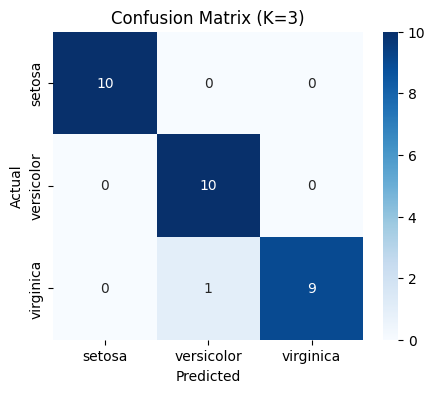

In [23]:
# Accuracy
acc = accuracy_score(y_val, y_pred)
print("Accuracy:", acc)

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", cm)

# Precision, Recall, F1-score
print("\nClassification Report:\n", classification_report(y_val, y_pred, target_names=le.classes_))

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (K=3)")
plt.show()


Cell 9 – Try Different Values of K

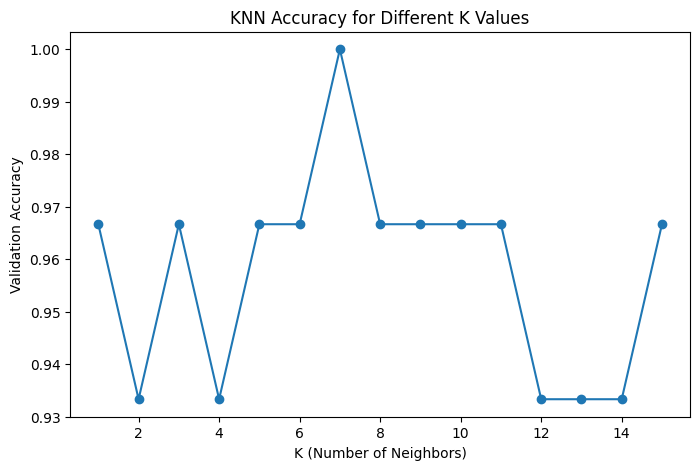

In [24]:
# Compare accuracy for different K values
k_values = range(1, 16)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    accuracies.append(accuracy_score(y_val, y_pred))

# Plot results
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Validation Accuracy")
plt.title("KNN Accuracy for Different K Values")
plt.show()


Cell 10: Train the Decision Tree

In [29]:
# Initialize the model
dtree = DecisionTreeClassifier(random_state=42)

# Train
dtree.fit(X_train, y_train)

# Predict
y_pred = dtree.predict(X_val)


Cell 11: Evaluate the Decision Tree Model

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Decision Tree Accuracy:", accuracy_score(y_val, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))

# Precision, Recall, F1
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Decision Tree Accuracy: 0.9333333333333333

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



Visualizaiton of Decision Tree Model

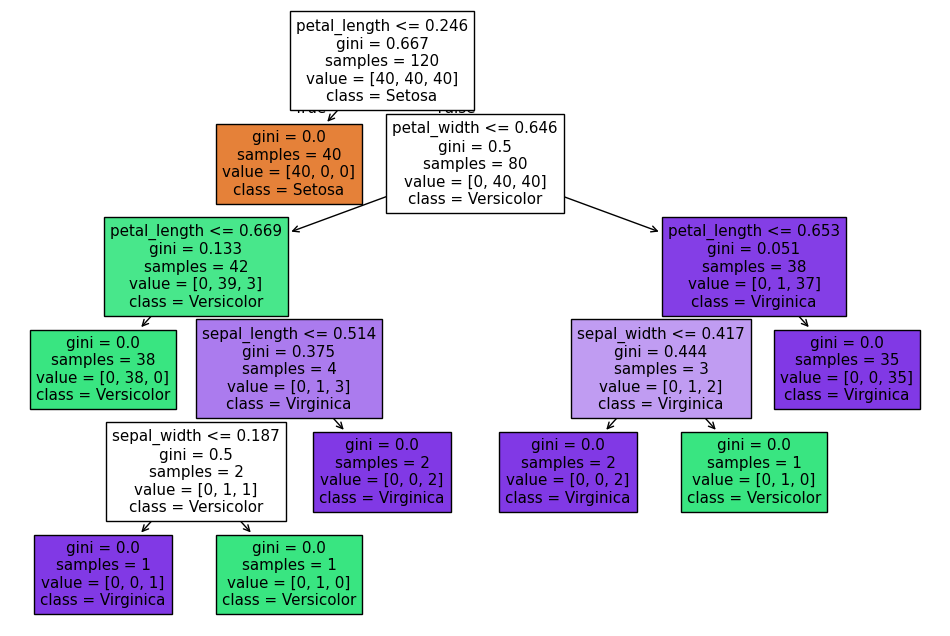

In [33]:
plt.figure(figsize=(12,8))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=['Setosa','Versicolor','Virginica'])
plt.show()


Cell 12 – Prune the Tree

In [36]:
# Pruned tree with max depth of 3
dt_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_pruned.fit(X_train, y_train)

# Predictions
y_pred_pruned = dt_pruned.predict(X_val)

# Evaluation
print("Pruned Accuracy:", accuracy_score(y_val, y_pred_pruned))
print("Pruned F1-score (macro):", f1_score(y_val, y_pred_pruned, average="macro"))


Pruned Accuracy: 0.9666666666666667
Pruned F1-score (macro): 0.9665831244778612
